# 이미지 검출(경계선)

pixabay - snowman
https://pixabay.com/ko/vectors/%ed%81%ac%eb%a6%ac%ec%8a%a4%eb%a7%88%ec%8a%a4-%ec%b6%94%ec%9a%b4-%ed%92%8d%ea%b2%bd-%ec%9e%a5%eb%a9%b4-1300089/

<img src='../cv_images/경계선.png'>

## Canny Edge Detection
- 이미지에서 **윤곽선(에지)**를 똑똑하게 찾아주는 아주 중요한 기법
- 컬러이미지에 적용할 경우 내부적으로 회색조로 변경한 후 에지 검출을 수행함.

- Canny Edge Detection 4단계
    - 1️⃣ Noise Reduction (노이즈 제거) : 잡음 때문에 잘못된 엣지를 검출하는 걸 막기 위해 **Gaussian Blur (가우시안 블러링)**을 적용해서 부드럽게 만들기 
        ```python
        blur = cv2.GaussianBlur(img, (5,5), 1.4)
        ```
    - 2️⃣ Finding Intensity Gradient (기울기(gradient) 계산) : 밝기가 얼마나 급격하게 변하는지 (밝기 차이) 계산. 변하는 정도(기울기)와 방향(어디로 밝아지는지)을 알아내기 위해 OpenCV 내부에서는 Sobel 연산 사용
        ```python
        Gx = Sobel(blur, 방향=x)  # 수평 기울기
        Gy = Sobel(blur, 방향=y)  # 수직 기울기
        magnitude = sqrt(Gx^2 + Gy^2)  # 전체 기울기 크기
        direction = atan2(Gy, Gx)      # 기울기 방향
        ```
    - 3️⃣ Non-Maximum Suppression (비최대 억제) : 기울기(gradient)가 가장 강한 부분만 살리고, 주변 약한 부분은 지움 => 가장 뾰족한(최고점)만 남겨서 엣지를 가늘게 만들어주는 단계 (최대 크기의 픽셀만 골라내서 에지 픽셀로 설정)
    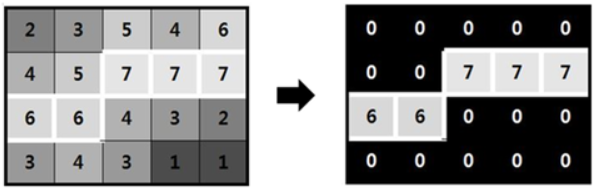

    - 4️⃣ Hysteresis Thresholding (이력 기반 문턱값 처리) : 모든 에지 후보들이 실제 에지인지 아닌지를 결정
        - 조명이나 다른 변수의 영향으로 인해 영상의 그래디언트가 미세하게 변화할 수 있기때문에 픽셀 값이 임계점보다 커지거나 낮아질 수 있는데, 이를 방지하기 위해 두 개의 임계값을 이용함. 
        - 강한 엣지는 무조건 엣지로 채택하고, 약한 엣지는 강한 엣지와 연결된 경우에만 엣지로 인정 => 진짜 엣지와 연결된 부분만 살려서 깔끔하게 정리. OpenCV에서는 두 개의 문턱값을 설정
        ```python
        edges = cv2.Canny(img, threshold1=50, threshold2=150)
        ```

- `cv2.Canny(img, threshold1, threshold2)`
    - threshold1 (하위 임계값, minVal): 이 값 이하의 그레이디언트(명암 변화율)를 가진 픽셀은 에지가 아니라고 간주함(에지로 간주되기 위한 최소한의 명암 변화량)

    - threshold2 (상위 임계값, maxVal): 이 값 이상의 그레이디언트를 가진 픽셀은 강한 에지로 간주되며, threshold1과 threshold2 사이의 그레이디언트를 가진 픽셀은 연결된 강한 에지가 존재할 경우에만 에지로 간주함

In [ ]:
import cv2

img_file = '../cv_images/snowman.png'

img = cv2.imread(img_file)
gray = cv2.imread(img_file,cv2.IMREAD_GRAYSCALE)
                  
canny1 = cv2.Canny(img, 150, 200) # 원본이미지, minVal(하위임계값), maxVal(상위임계값)
canny2 = cv2.Canny(img, 50, 250)  # 코드입력 # 원본이미지, minVal(하위임계값), maxVal(상위임계값) - 100, 250

cv2.imshow('img', img)
cv2.imshow('canny1', canny1)
cv2.imshow('canny2', canny2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

def empty(pos):
    pass

img = cv2.imread('../cv_images/snowman.png')

name = 'Trackbar'
cv2.namedWindow(name)
cv2.createTrackbar('threshold1', name, 0, 255, empty)
cv2.createTrackbar('threshold2', name, 0, 255, empty)

while True:
    threshold1 = cv2.getTrackbarPos('threshold1', name)
    threshold2 = cv2.getTrackbarPos('threshold2', name)

    canny = cv2.Canny(img, threshold1, threshold2)
                    # 대상이미지, minVal(하위임계값), maxVal(상위임계값)

    cv2.imshow('img', img)
    cv2.imshow(name, canny)
    
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()

### > 에지검출 : 가운시안블러 + 케니엣지

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('../cv_images/flower.jpg')
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

med_val = np.median(src)
# 하위 임계값을 0 또는 중앙의 70%로 설정하겠다는 의미이다.
lower = int(max(0, 0.7 * med_val))

# 상위 임계값을 130% 또는 255로 설정하겠다.
upper = int(min(255,1.3*med_val))

# 임계값을(높은/낮은 값) 만든다음 에지값만 받아내기
dst = cv2.GaussianBlur(src, (3,3), 0, 0)

# 마스크가 클 수록 얇아지고 작을수록 커진다. 에지값이
dst = cv2.Canny(dst,lower, upper,3)
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(src_rgb)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(dst_rgb, cmap='gray')  # 에지 결과는 흑백이라 cmap을 추가하는 게 보기 좋아요
plt.title('Canny Edge') 
plt.show()

# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()